In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Sample data
df = pd.read_csv('Housing (1).csv')

# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Split numerical and categorical features
numerical_features = X.select_dtypes(include=['int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Build preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformations to numerical and categorical features
X = preprocessor.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
11/11 [==============================] - 1s 29ms/step - loss: 25349383520256.0000 - val_loss: 24781592199168.0000
Epoch 2/50
11/11 [==============================] - 0s 20ms/step - loss: 25349379325952.0000 - val_loss: 24781583810560.0000
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 25349368840192.0000 - val_loss: 24781571227648.0000
Epoch 4/50
11/11 [==============================] - 0s 10ms/step - loss: 25349354160128.0000 - val_loss: 24781556547584.0000
Epoch 5/50
11/11 [==============================] - 0s 14ms/step - loss: 25349337382912.0000 - val_loss: 24781533478912.0000
Epoch 6/50
11/11 [==============================] - 0s 10ms/step - loss: 25349308022784.0000 - val_loss: 24781502021632.0000
Epoch 7/50
11/11 [==============================] - 0s 10ms/step - loss: 25349270274048.0000 - val_loss: 24781457981440.0000
Epoch 8/50
11/11 [==============================] - 0s 19ms/step - loss: 25349219942400.0000 - val_loss: 24781399261184.0000


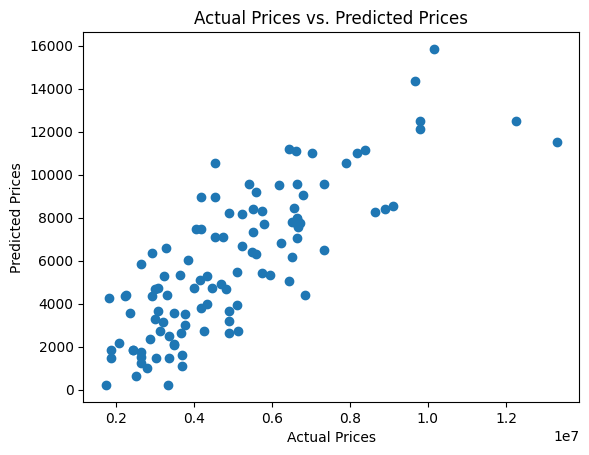

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: -4.946891003231493
